In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a757ff8cbbf22e98923d1228443563a9


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
City not found. Skipping...
Processing Record 2 of Set 1 | tonj
City not found. Skipping...
Processing Record 3 of Set 1 | gravdal
City not found. Skipping...
Processing Record 4 of Set 1 | wad rawah
City not found. Skipping...
Processing Record 5 of Set 1 | nuuk
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
City not found. Skipping...
Processing Record 7 of Set 1 | moi
City not found. Skipping...
Processing Record 8 of Set 1 | la grande
City not found. Skipping...
Processing Record 9 of Set 1 | tuktoyaktuk
City not found. Skipping...
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | thompson
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 14 of Set 1 | ilulissat
City not found. 

City not found. Skipping...
Processing Record 21 of Set 3 | vaitupu
City not found. Skipping...
Processing Record 22 of Set 3 | marystown
City not found. Skipping...
Processing Record 23 of Set 3 | los llanos de aridane
City not found. Skipping...
Processing Record 24 of Set 3 | puerto ayora
City not found. Skipping...
Processing Record 25 of Set 3 | hithadhoo
City not found. Skipping...
Processing Record 26 of Set 3 | sitka
City not found. Skipping...
Processing Record 27 of Set 3 | airai
City not found. Skipping...
Processing Record 28 of Set 3 | korla
City not found. Skipping...
Processing Record 29 of Set 3 | sorland
City not found. Skipping...
Processing Record 30 of Set 3 | saint-pierre
City not found. Skipping...
Processing Record 31 of Set 3 | paita
City not found. Skipping...
Processing Record 32 of Set 3 | tacuarembo
City not found. Skipping...
Processing Record 33 of Set 3 | katsuura
City not found. Skipping...
Processing Record 34 of Set 3 | kaohsiung
City not found. Skippi

City not found. Skipping...
Processing Record 41 of Set 5 | kouroussa
City not found. Skipping...
Processing Record 42 of Set 5 | dukat
City not found. Skipping...
Processing Record 43 of Set 5 | bansda
City not found. Skipping...
Processing Record 44 of Set 5 | beypur
City not found. Skipping...
Processing Record 45 of Set 5 | waipawa
City not found. Skipping...
Processing Record 46 of Set 5 | chifeng
City not found. Skipping...
Processing Record 47 of Set 5 | bethel
City not found. Skipping...
Processing Record 48 of Set 5 | sayat
City not found. Skipping...
Processing Record 49 of Set 5 | lapua
City not found. Skipping...
Processing Record 50 of Set 5 | ribeira grande
City not found. Skipping...
Processing Record 1 of Set 6 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 6 | kahului
City not found. Skipping...
Processing Record 3 of Set 6 | tymovskoye
City not found. Skipping...
Processing Record 4 of Set 6 | montepuez
City not found. Skipping...
Processing

Processing Record 9 of Set 9 | daru
Processing Record 10 of Set 9 | shaunavon
Processing Record 11 of Set 9 | okhotsk
Processing Record 12 of Set 9 | staunton
Processing Record 13 of Set 9 | gimli
Processing Record 14 of Set 9 | pontianak
Processing Record 15 of Set 9 | ngunguru
Processing Record 16 of Set 9 | tawnat
City not found. Skipping...
Processing Record 17 of Set 9 | tidore
City not found. Skipping...
Processing Record 18 of Set 9 | sarab
Processing Record 19 of Set 9 | carutapera
Processing Record 20 of Set 9 | homer
Processing Record 21 of Set 9 | hanover
Processing Record 22 of Set 9 | west wendover
Processing Record 23 of Set 9 | san quintin
Processing Record 24 of Set 9 | te anau
Processing Record 25 of Set 9 | abashiri
Processing Record 26 of Set 9 | lasa
Processing Record 27 of Set 9 | maarianhamina
Processing Record 28 of Set 9 | zajas
Processing Record 29 of Set 9 | koutsouras
Processing Record 30 of Set 9 | portland
Processing Record 31 of Set 9 | koungou
Processing 

Processing Record 49 of Set 12 | medea
Processing Record 50 of Set 12 | parana
Processing Record 1 of Set 13 | high rock
Processing Record 2 of Set 13 | tukrah
Processing Record 3 of Set 13 | palmer
Processing Record 4 of Set 13 | hambantota
Processing Record 5 of Set 13 | nouadhibou
Processing Record 6 of Set 13 | goure
Processing Record 7 of Set 13 | mookane
Processing Record 8 of Set 13 | san ramon
Processing Record 9 of Set 13 | arecibo
Processing Record 10 of Set 13 | huzhou
Processing Record 11 of Set 13 | jurado
Processing Record 12 of Set 13 | san mateo del mar
Processing Record 13 of Set 13 | riyadh
Processing Record 14 of Set 13 | constantine
Processing Record 15 of Set 13 | tommot
Processing Record 16 of Set 13 | weligama
Processing Record 17 of Set 13 | havelock
Processing Record 18 of Set 13 | narasannapeta
Processing Record 19 of Set 13 | nsukka
Processing Record 20 of Set 13 | gorontalo
Processing Record 21 of Set 13 | karaidel
-----------------------------
Data Retrieva

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.34,57.76,70.00,73,40,3.36,MU,2020-08-20 23:02:27
1,Baker City,44.77,-117.83,84.20,23,1,4.70,US,2020-08-20 23:02:27
2,Marathon,44.90,-89.77,81.00,61,1,11.41,US,2020-08-20 23:02:27
3,Tanga,-5.07,39.10,74.14,83,75,7.81,TZ,2020-08-20 23:02:27
4,Camacha,33.08,-16.33,75.20,88,40,8.05,PT,2020-08-20 23:02:30
5,Kanniyakumari,8.08,77.57,79.09,85,100,17.09,IN,2020-08-20 23:02:30
6,Bengkulu,-3.80,102.27,75.83,81,79,5.10,ID,2020-08-20 23:02:30
7,West Plains,36.73,-91.85,84.20,42,20,5.82,US,2020-08-20 23:02:30
8,Cortez,37.35,-108.59,96.80,11,1,10.29,US,2020-08-20 23:00:18
9,Porto Santo,33.07,-16.34,75.20,88,40,8.05,PT,2020-08-20 23:02:31


In [10]:
city_data

[{'City': 'Bambous Virieux',
  'Lat': -20.34,
  'Lng': 57.76,
  'Max Temp': 70,
  'Humidity': 73,
  'Cloudiness': 40,
  'Wind Speed': 3.36,
  'Country': 'MU',
  'Date': '2020-08-20 23:02:27'},
 {'City': 'Baker City',
  'Lat': 44.77,
  'Lng': -117.83,
  'Max Temp': 84.2,
  'Humidity': 23,
  'Cloudiness': 1,
  'Wind Speed': 4.7,
  'Country': 'US',
  'Date': '2020-08-20 23:02:27'},
 {'City': 'Marathon',
  'Lat': 44.9,
  'Lng': -89.77,
  'Max Temp': 81,
  'Humidity': 61,
  'Cloudiness': 1,
  'Wind Speed': 11.41,
  'Country': 'US',
  'Date': '2020-08-20 23:02:27'},
 {'City': 'Tanga',
  'Lat': -5.07,
  'Lng': 39.1,
  'Max Temp': 74.14,
  'Humidity': 83,
  'Cloudiness': 75,
  'Wind Speed': 7.81,
  'Country': 'TZ',
  'Date': '2020-08-20 23:02:27'},
 {'City': 'Camacha',
  'Lat': 33.08,
  'Lng': -16.33,
  'Max Temp': 75.2,
  'Humidity': 88,
  'Cloudiness': 40,
  'Wind Speed': 8.05,
  'Country': 'PT',
  'Date': '2020-08-20 23:02:30'},
 {'City': 'Kanniyakumari',
  'Lat': 8.08,
  'Lng': 77.57,
  'M

In [11]:
#Reorder columns for City_data_df
citydata_neworder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[citydata_neworder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2020-08-20 23:02:27,-20.34,57.76,70.00,73,40,3.36
1,Baker City,US,2020-08-20 23:02:27,44.77,-117.83,84.20,23,1,4.70
2,Marathon,US,2020-08-20 23:02:27,44.90,-89.77,81.00,61,1,11.41
3,Tanga,TZ,2020-08-20 23:02:27,-5.07,39.10,74.14,83,75,7.81
4,Camacha,PT,2020-08-20 23:02:30,33.08,-16.33,75.20,88,40,8.05
5,Kanniyakumari,IN,2020-08-20 23:02:30,8.08,77.57,79.09,85,100,17.09
6,Bengkulu,ID,2020-08-20 23:02:30,-3.80,102.27,75.83,81,79,5.10
7,West Plains,US,2020-08-20 23:02:30,36.73,-91.85,84.20,42,20,5.82
8,Cortez,US,2020-08-20 23:00:18,37.35,-108.59,96.80,11,1,10.29
9,Porto Santo,PT,2020-08-20 23:02:31,33.07,-16.34,75.20,88,40,8.05


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

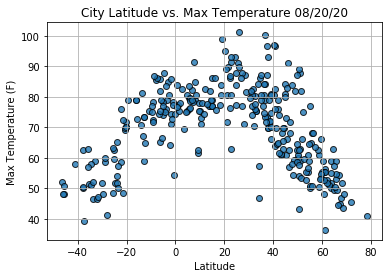

In [15]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

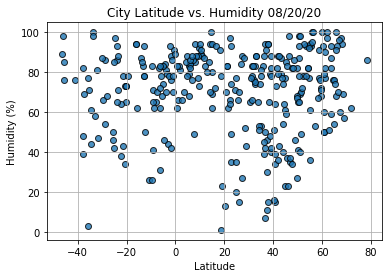

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

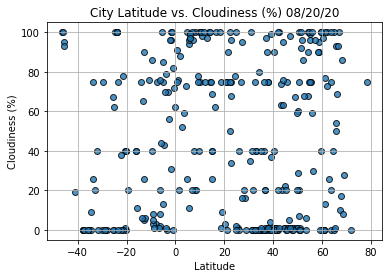

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

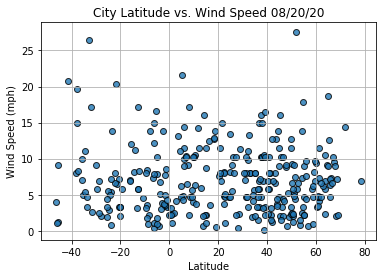

In [19]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()